# 🚶 서울시 유동인구 분석 - EDA
- **기간**: 2022년 1분기 ~ 2024년 4분기 (프로젝트 기간에 맞춤)
- **목적**: 행정동별 유동인구 데이터가 회귀분석에 적합한지 확인

## 1. 데이터 로드

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (안티그래비티용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

print("라이브러리 로드 완료!")

라이브러리 로드 완료!


In [3]:
# 유동인구 데이터 로드
df = pd.read_csv('data/floating_population.csv', encoding='cp949')
print(f"✅ 전체 데이터 로드 완료! 총 {len(df):,}개 row")
print(f"기간: {df['기준_년분기_코드'].min()} ~ {df['기준_년분기_코드'].max()}")

✅ 전체 데이터 로드 완료! 총 11,475개 row
기간: 20191 ~ 20253


In [4]:
# 프로젝트 기간에 맞게 필터링 (2022~2024)
df = df[(df['기준_년분기_코드'] >= 20221) & (df['기준_년분기_코드'] <= 20244)].copy()
print(f"✅ 2022~2024년 필터링 완료! 총 {len(df):,}개 row")

✅ 2022~2024년 필터링 완료! 총 5,100개 row


## 2. 전체 데이터 개요

In [5]:
print("📊 전체 데이터 개요")
print("=" * 50)
print(f"전체 row 수: {len(df):,}개")
print(f"컬럼 수: {len(df.columns)}개")
print(f"총 분기 수: {df['기준_년분기_코드'].nunique()}개")
print(f"행정동 수: {df['행정동_코드'].nunique()}개")

📊 전체 데이터 개요
전체 row 수: 5,100개
컬럼 수: 25개
총 분기 수: 12개
행정동 수: 425개


In [6]:
# 컬럼 확인
print("📋 컬럼 목록:")
print(df.columns.tolist())

📋 컬럼 목록:
['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수', '시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수', '월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수']


In [7]:
# 기간 확인
print("📅 분기 목록:")
print(sorted(df['기준_년분기_코드'].unique()))

📅 분기 목록:
[np.int64(20221), np.int64(20222), np.int64(20223), np.int64(20224), np.int64(20231), np.int64(20232), np.int64(20233), np.int64(20234), np.int64(20241), np.int64(20242), np.int64(20243), np.int64(20244)]


## 3. 분기별 데이터 개수

In [8]:
print("📅 분기별 데이터 개수")
print("=" * 50)
quarter_counts = df['기준_년분기_코드'].value_counts().sort_index()
print(quarter_counts)

📅 분기별 데이터 개수
기준_년분기_코드
20221    425
20222    425
20223    425
20224    425
20231    425
20232    425
20233    425
20234    425
20241    425
20242    425
20243    425
20244    425
Name: count, dtype: int64


## 4. 기초 통계 (총 유동인구)

In [9]:
print("📈 기초 통계 (행정동별 총 유동인구)")
print("=" * 50)
print(df['총_유동인구_수'].describe())

📈 기초 통계 (행정동별 총 유동인구)
count    5.100000e+03
mean     5.518692e+06
std      2.984313e+06
min      7.864000e+03
25%      3.441144e+06
50%      5.183287e+06
75%      6.884400e+06
max      2.204822e+07
Name: 총_유동인구_수, dtype: float64


In [10]:
# 유동인구 상위/하위 행정동
print("\n🔝 유동인구 상위 10개 행정동 (최근 분기 기준)")
print("=" * 50)
latest_quarter = df['기준_년분기_코드'].max()
df_latest = df[df['기준_년분기_코드'] == latest_quarter]
print(df_latest.nlargest(10, '총_유동인구_수')[['행정동_코드_명', '총_유동인구_수']])


🔝 유동인구 상위 10개 행정동 (최근 분기 기준)
         행정동_코드_명  총_유동인구_수
1506         북아현동  21943903
1331         역삼1동  20368338
1277           길동  17701811
1485          서교동  17634436
1455         화곡1동  16116876
1619          용신동  14419712
1691  종로1?2?3?4가동  14152630
1517          대조동  13208241
1492          공덕동  12821037
1618          제기동  12779827


In [11]:
print("\n🔻 유동인구 하위 10개 행정동 (최근 분기 기준)")
print("=" * 50)
print(df_latest.nsmallest(10, '총_유동인구_수')[['행정동_코드_명', '총_유동인구_수']])


🔻 유동인구 하위 10개 행정동 (최근 분기 기준)
     행정동_코드_명  총_유동인구_수
1276     둔촌1동     10979
1354     반포본동    457075
1293     잠실7동    673142
1311      오륜동    701628
1304     가락1동    786269
1695      평창동    887229
1424       항동    935631
1526     상계8동    944444
1696      부암동    961812
1685     창신3동    975151


## 5. 결측치 확인

In [12]:
print("🔍 결측치 확인")
print("=" * 50)
null_counts = df.isnull().sum()
null_pct = (null_counts / len(df) * 100).round(2)
null_df = pd.DataFrame({'결측치 수': null_counts, '비율(%)': null_pct})
null_with_values = null_df[null_df['결측치 수'] > 0]

if len(null_with_values) == 0:
    print("✅ 결측치 없음!")
else:
    print(null_with_values)

🔍 결측치 확인
✅ 결측치 없음!


## 6. 데이터 양 적합성 판단

In [13]:
print("🎯 데이터 양 적합성 판단")
print("=" * 50)

row_count = len(df)
quarter_count = df['기준_년분기_코드'].nunique()
dong_count = df['행정동_코드'].nunique()
null_pct_pop = df['총_유동인구_수'].isnull().sum() / len(df) * 100

# 판단
print(f"{'✅' if row_count >= 1000 else '❌'} 데이터 양: {row_count:,}개 (기준: 1,000개 이상)")
print(f"{'✅' if quarter_count >= 8 else '❌'} 기간: {quarter_count}개 분기 (기준: 8개 이상)")
print(f"{'✅' if null_pct_pop < 10 else '❌'} 결측치: {null_pct_pop:.1f}% (기준: 10% 미만)")

🎯 데이터 양 적합성 판단
✅ 데이터 양: 5,100개 (기준: 1,000개 이상)
✅ 기간: 12개 분기 (기준: 8개 이상)
✅ 결측치: 0.0% (기준: 10% 미만)


## 7. 시각화 - 분기별 평균 유동인구 추이

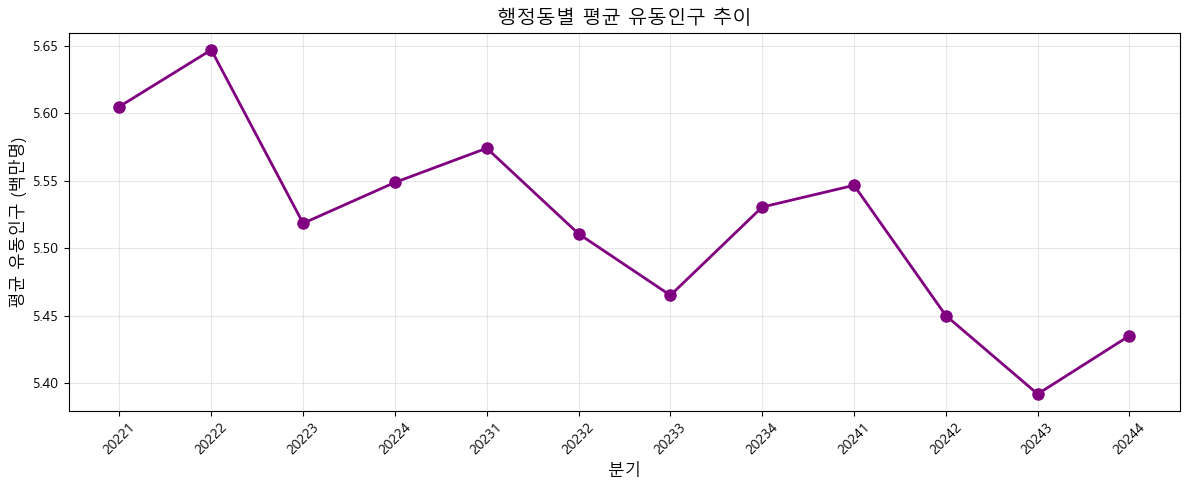

In [14]:
# 분기별 평균 유동인구
quarterly_pop = df.groupby('기준_년분기_코드')['총_유동인구_수'].mean()

plt.figure(figsize=(12, 5))
plt.plot(quarterly_pop.index.astype(str), quarterly_pop.values / 1e6, marker='o', linewidth=2, markersize=8, color='purple')
plt.title('행정동별 평균 유동인구 추이', fontsize=14)
plt.xlabel('분기', fontsize=12)
plt.ylabel('평균 유동인구 (백만명)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 8. 시각화 - 유동인구 분포

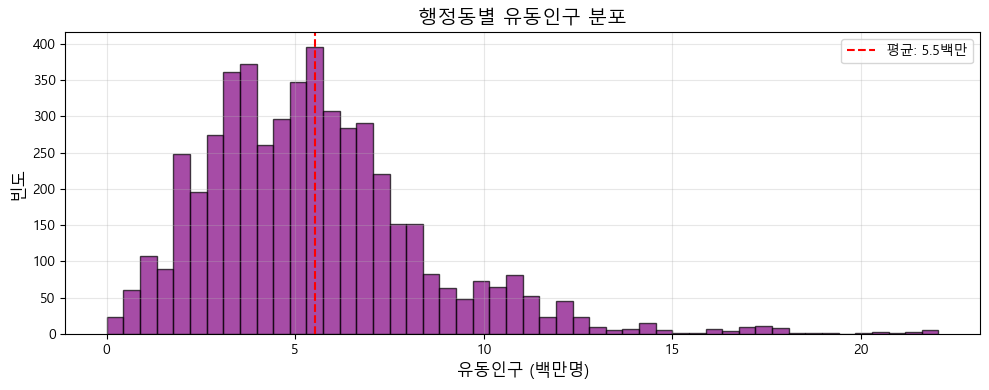

In [15]:
plt.figure(figsize=(10, 4))
plt.hist(df['총_유동인구_수'] / 1e6, bins=50, edgecolor='black', alpha=0.7, color='purple')
plt.title('행정동별 유동인구 분포', fontsize=14)
plt.xlabel('유동인구 (백만명)', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.axvline(df['총_유동인구_수'].mean() / 1e6, color='red', linestyle='--', label=f'평균: {df["총_유동인구_수"].mean()/1e6:.1f}백만')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 9. 성별 유동인구 비교

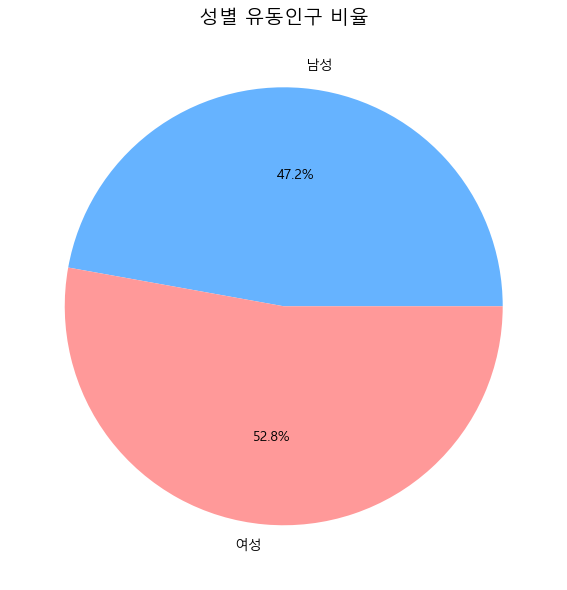

In [16]:
# 성별 유동인구 비율
male_total = df['남성_유동인구_수'].sum()
female_total = df['여성_유동인구_수'].sum()

plt.figure(figsize=(6, 6))
plt.pie([male_total, female_total], labels=['남성', '여성'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('성별 유동인구 비율', fontsize=14)
plt.tight_layout()
plt.show()

## 10. 연령대별 유동인구 분포

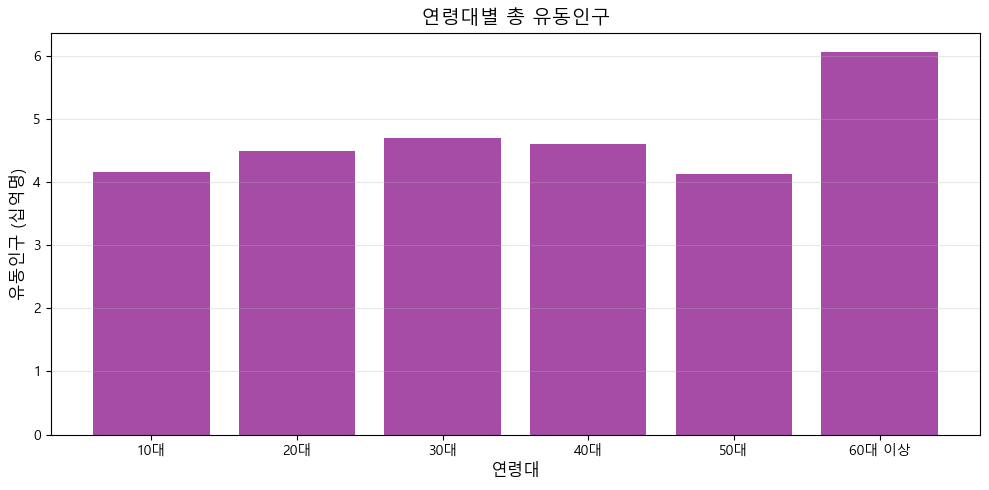

In [17]:
# 연령대별 유동인구 합계
age_cols = ['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', 
            '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']
age_labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
age_totals = [df[col].sum() for col in age_cols]

plt.figure(figsize=(10, 5))
plt.bar(age_labels, [x/1e9 for x in age_totals], color='purple', alpha=0.7)
plt.title('연령대별 총 유동인구', fontsize=14)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('유동인구 (십억명)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 11. 시간대별 유동인구 분포

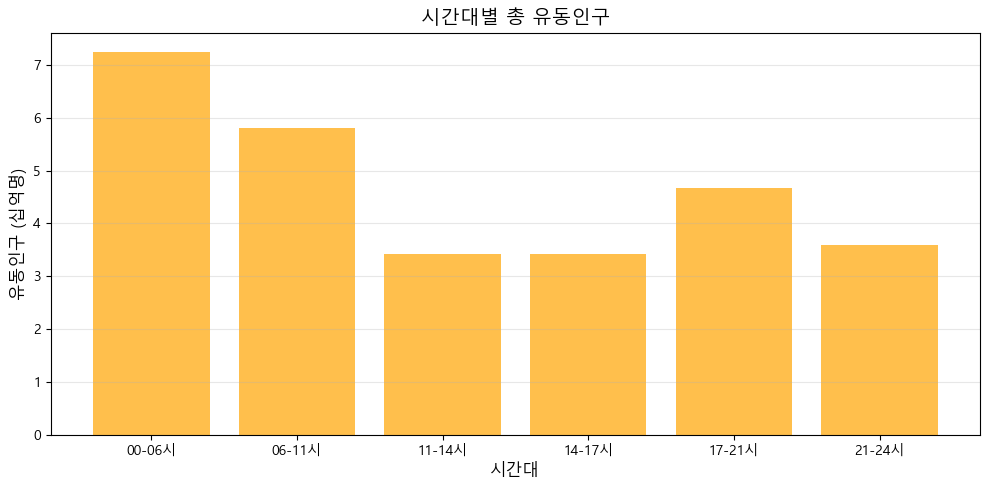

In [18]:
# 시간대별 유동인구 합계
time_cols = ['시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수',
             '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수']
time_labels = ['00-06시', '06-11시', '11-14시', '14-17시', '17-21시', '21-24시']
time_totals = [df[col].sum() for col in time_cols]

plt.figure(figsize=(10, 5))
plt.bar(time_labels, [x/1e9 for x in time_totals], color='orange', alpha=0.7)
plt.title('시간대별 총 유동인구', fontsize=14)
plt.xlabel('시간대', fontsize=12)
plt.ylabel('유동인구 (십억명)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 12. 요일별 유동인구 분포

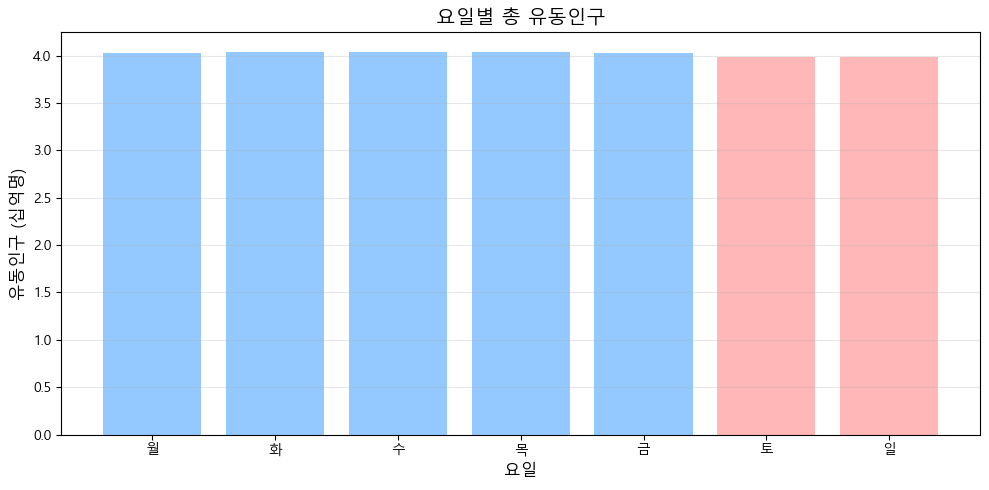

In [19]:
# 요일별 유동인구 합계
day_cols = ['월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수',
            '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수']
day_labels = ['월', '화', '수', '목', '금', '토', '일']
day_totals = [df[col].sum() for col in day_cols]

plt.figure(figsize=(10, 5))
colors = ['#66b3ff']*5 + ['#ff9999']*2  # 주중: 파랑, 주말: 빨강
plt.bar(day_labels, [x/1e9 for x in day_totals], color=colors, alpha=0.7)
plt.title('요일별 총 유동인구', fontsize=14)
plt.xlabel('요일', fontsize=12)
plt.ylabel('유동인구 (십억명)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 📝 최종 결론

In [20]:
print("=" * 60)
print("📝 최종 결론")
print("=" * 60)
print(f"""
[분석 대상]
- 기간: 2022년 1분기 ~ 2024년 4분기 ({quarter_count}개 분기)
- 지역: 서울시 {dong_count}개 행정동

[데이터 규모]
- 총 데이터 수: {row_count:,}개
- 회귀분석 최소 기준(1,000개) 대비 {row_count/1000:.1f}배

[유동인구 통계]
- 평균: {df['총_유동인구_수'].mean():,.0f}명
- 최소: {df['총_유동인구_수'].min():,.0f}명
- 최대: {df['총_유동인구_수'].max():,.0f}명

[적합성 판단]
✅ 데이터 양: 적합 ({row_count:,}개 > 1,000개)
✅ 기간: 적합 ({quarter_count}개 분기 > 8개 분기)
✅ 결측치: 적합 (0%)

[활용 컬럼]
- 총_유동인구_수: 기본 독립변수
- 시간대별/요일별: 세부 분석 가능

→ 유동인구 데이터, 회귀분석 진행에 충분합니다! 🎉
""")

📝 최종 결론

[분석 대상]
- 기간: 2022년 1분기 ~ 2024년 4분기 (12개 분기)
- 지역: 서울시 425개 행정동

[데이터 규모]
- 총 데이터 수: 5,100개
- 회귀분석 최소 기준(1,000개) 대비 5.1배

[유동인구 통계]
- 평균: 5,518,692명
- 최소: 7,864명
- 최대: 22,048,225명

[적합성 판단]
✅ 데이터 양: 적합 (5,100개 > 1,000개)
✅ 기간: 적합 (12개 분기 > 8개 분기)
✅ 결측치: 적합 (0%)

[활용 컬럼]
- 총_유동인구_수: 기본 독립변수
- 시간대별/요일별: 세부 분석 가능

→ 유동인구 데이터, 회귀분석 진행에 충분합니다! 🎉

